In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_excel('/home/user/Documents/OYI_PC_2and3/PROJECTS/hobbyhacks/Recipes.xlsx')

In [3]:
data.head()

,Cuisine,Level,Recipe
0,NaN,NaN,NaN
1,American,Beginner,Philly Cheese Sandwich
2,American,Beginner,Hamburger
3,American,Intermediate,Southern Fried Chicken
4,American,Intermediate,Clam Chowder


In [4]:
#The dataset contains 112 rows and 3 columns

data.shape

(112, 3)

In [5]:
#All values are categorical

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Cuisine  96 non-null     object
 1   Level    96 non-null     object
 2   Recipe   96 non-null     object
dtypes: object(3)
memory usage: 2.8+ KB


In [6]:
data.describe()

,Cuisine,Level,Recipe
count,96,96,96
unique,16,3,96
top,French,Intermediate,Orzo Salad
freq,6,32,1


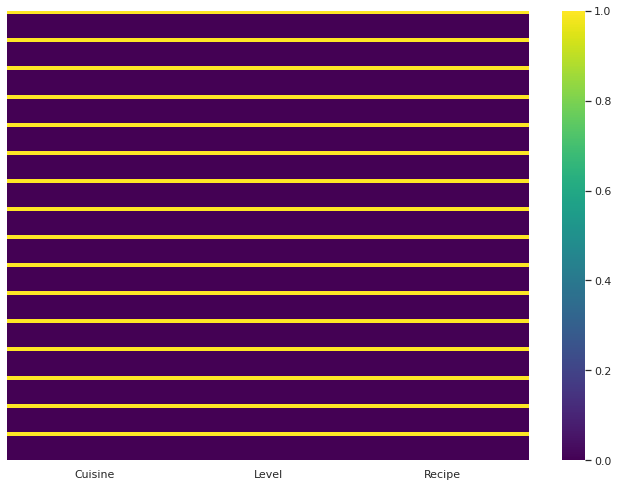

In [7]:
#According to this heatmap there are specifically rows with all missing values

sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.show()

In [10]:
data.dropna(axis=0, inplace=True)

In [11]:
data.shape

(96, 3)

In [12]:
#I want to see if I can spot any problem on the data

data.Cuisine.unique()

array(['American', 'Asian', 'BBQ', 'Brazilian', 'Cajun', 'Caribbean',
       'Germanic', 'Greek', 'French', 'Hungarian', 'Indian',
       'Mediterranean', 'Scottish', 'Spanish', 'Vegan', 'Vegetarian'],
      dtype=object)

In [13]:
data.Level.unique()

array(['Beginner', 'Intermediate', 'Advance'], dtype=object)

In [14]:
data.Recipe.unique()

array(['Philly Cheese Sandwich', 'Hamburger', 'Southern Fried Chicken',
       'Clam Chowder', 'Baby Back Ribs', 'Pulled pork', 'Lettuce Wrap',
       'Crab Rangoon', 'Vegetable lo mein', 'Egg Rolls',
       'Korean Pork Chops', 'Orange Chicken', 'bbq burgers', 'Kebobs',
       'Ribeyes', 'Can Chicken', 'Ribs', 'Apple Butter BBQ Chicken',
       'Cheese Bread Pao de Queijo', 'Chicken Bobo',
       'Mojo Pork Tacos With Sweet Apple Slaw', 'Seafood Stew',
       'Feijoada\xa0', 'BBQ Churrasco Crasileiro', 'Corn Fritters',
       'Po Boys', 'Cajun chicken pasta', 'Crab cakes', 'Gumbo',
       'Jambalaya', 'Ham and bean soup', 'Jerk fried pork chops',
       'Cuban Picadillo', 'Jamaican style beef stew',
       'Salmon with Coconut Cream', 'Chipotle Pork Sliders',
       'Chicken and red cabbage', 'Wienerschinitzel', 'Beer glazed brats',
       'Cottage Fries', 'Potato Dumplings', 'Spatzle', 'Orzo Salad',
       'Greek lentil soup', 'Spinach pie', 'Lamb Pita', 'Artichoke Cod',
       'Past

In [15]:
data.drop_duplicates()

,Cuisine,Level,Recipe
1,American,Beginner,Philly Cheese Sandwich
2,American,Beginner,Hamburger
3,American,Intermediate,Southern Fried Chicken
4,American,Intermediate,Clam Chowder
5,American,Advance,Baby Back Ribs
...,...,...,...
107,Vegetarian,Beginner,Vegetarian Chili
108,Vegetarian,Intermediate,Spring Asparagus Tart
109,Vegetarian,Intermediate,Vegtable Lasagne
110,Vegetarian,Advance,Cheese Souffle


In [16]:
#I will encode the variables in order to manage the data easily

recipe = data.copy()

In [18]:
import category_encoders as ce

# Step 1. Instantiate the model with the necessary inputs
encoder = ce.OrdinalEncoder(cols=['Cuisine', 'Level', 'Recipe'])

# Step 2. Fit the variable to the instatiated model
recipe = encoder.fit_transform(data)

In [19]:
print(recipe)

     Cuisine  Level  Recipe
1          1      1       1
2          1      1       2
3          1      2       3
4          1      2       4
5          1      3       5
..       ...    ...     ...
107       16      1      92
108       16      2      93
109       16      2      94
110       16      3      95
111       16      3      96

[96 rows x 3 columns]


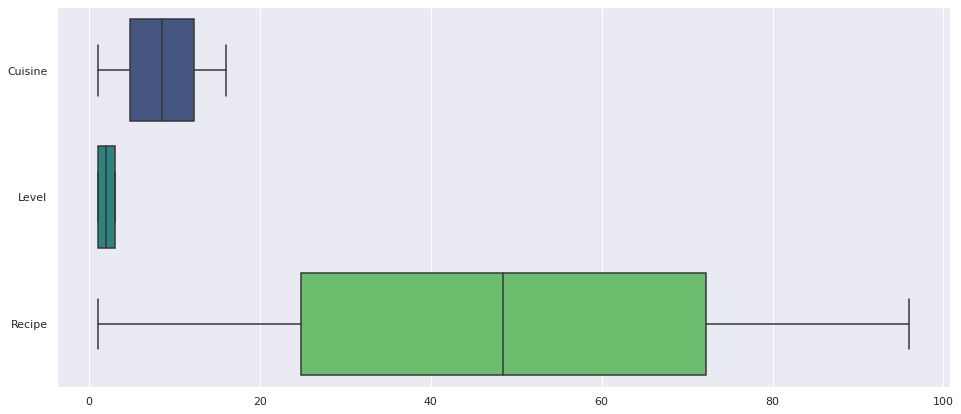

In [20]:
#How is the distribution of the variables? Is it true there were not outliers?

plt.figure(figsize=(16,7))
sns.boxplot(data=recipe.loc[:] , orient="h", palette="viridis")

# Model building with Kmodes

In [24]:
#Using K-Mode with "Cao" initialization

from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(recipe)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 214.0


In [25]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0], dtype=uint16)

In [27]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = recipe.columns

In [28]:
# Mode of the clusters
clusterCentroidsDf

,Cuisine,Level,Recipe
0,1,1,1
1,2,2,9


In [29]:
#Using K-Mode with "Huang" initialization

km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(recipe)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 214.0


In [30]:
# Predicted clusters
fitClusters_huang

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0], dtype=uint16)

In [31]:
#Choosing K by comparing Cost against each K

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(recipe)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 249.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 214.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 183.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 180.0


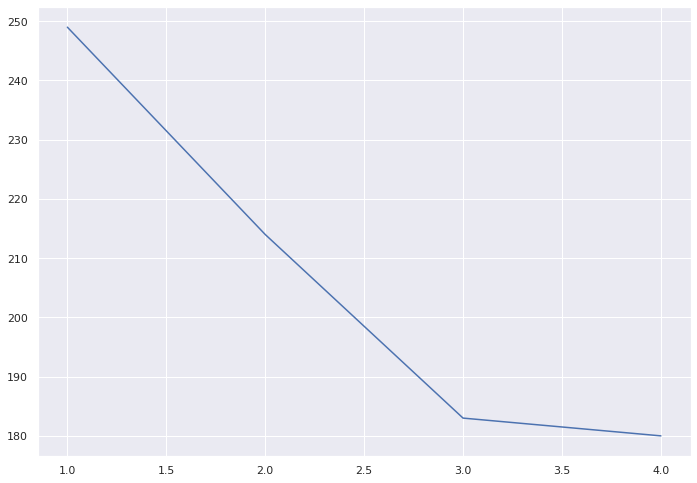

In [32]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [33]:
## Choosing K=3

In [35]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(recipe)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 183.0


In [36]:
fitClusters_cao

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1,
       2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0,
       1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2,
       0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1,
       2, 2, 0, 0, 1, 1, 2, 2], dtype=uint16)

In [37]:
#Combining the predicted clusters with the original DF